### Description

The problem is to predict metal or rock objects from sonar return data.

Each pattern is a set of 60 numbers in the range 0.0 to 1.0, each number represents the energy within a particular frequency band, integrated over a certain period of time.

The label associated with each record contains the letter R if the object is a rock and M if it is a mine (metal cylinder).

### 1. Load dataset

In [14]:
# Load libraries
import numpy as np
from matplotlib import pyplot as plt
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix

In [29]:
# Load dataset
url = 'sonar.all-data.csv'
dataset = read_csv(url, header=None)

In [30]:
dataset.head(10)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
5,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R
6,0.0317,0.0956,0.1321,0.1408,0.1674,0.1710,0.0731,0.1401,0.2083,0.3513,...,0.0201,0.0248,0.0131,0.0070,0.0138,0.0092,0.0143,0.0036,0.0103,R
7,0.0519,0.0548,0.0842,0.0319,0.1158,0.0922,0.1027,0.0613,0.1465,0.2838,...,0.0081,0.0120,0.0045,0.0121,0.0097,0.0085,0.0047,0.0048,0.0053,R
8,0.0223,0.0375,0.0484,0.0475,0.0647,0.0591,0.0753,0.0098,0.0684,0.1487,...,0.0145,0.0128,0.0145,0.0058,0.0049,0.0065,0.0093,0.0059,0.0022,R
9,0.0164,0.0173,0.0347,0.0070,0.0187,0.0671,0.1056,0.0697,0.0962,0.0251,...,0.0090,0.0223,0.0179,0.0084,0.0068,0.0032,0.0035,0.0056,0.0040,R


### 2. Explore the dataset

In [31]:
dataset.shape

(208, 61)

In [32]:
dataset.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [33]:
dataset.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
       ...   
56    float64
57    float64
58    float64
59    float64
60     object
Length: 61, dtype: object

In [34]:
# class distribution
print(dataset.groupby(60).size())

60
M    111
R     97
dtype: int64


The classes are reasonably balanced between M (mines) and R (rocks).

### 3. Data visualization

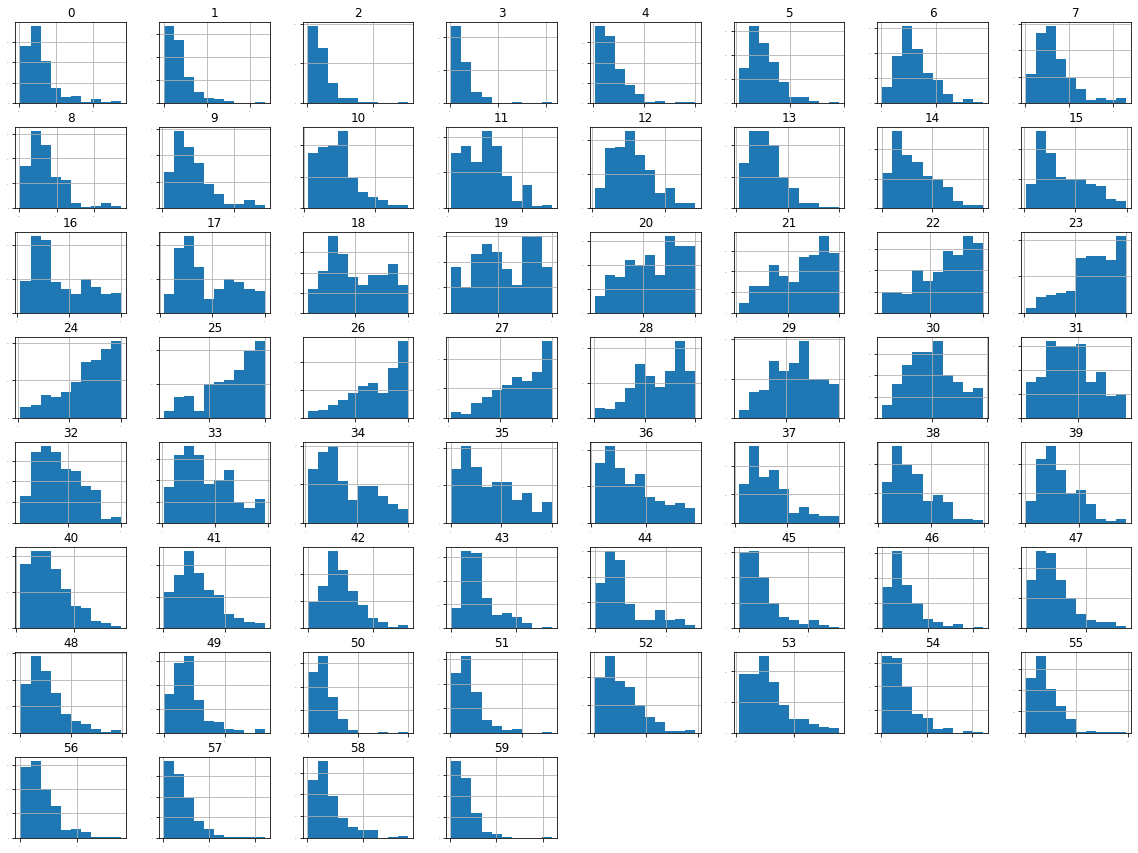

In [35]:
# histograms
dataset.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1,figsize=(20, 15))
plt.show()

There are a lot of Gaussian distributions and perhaps some exponential distributions for other attributes.

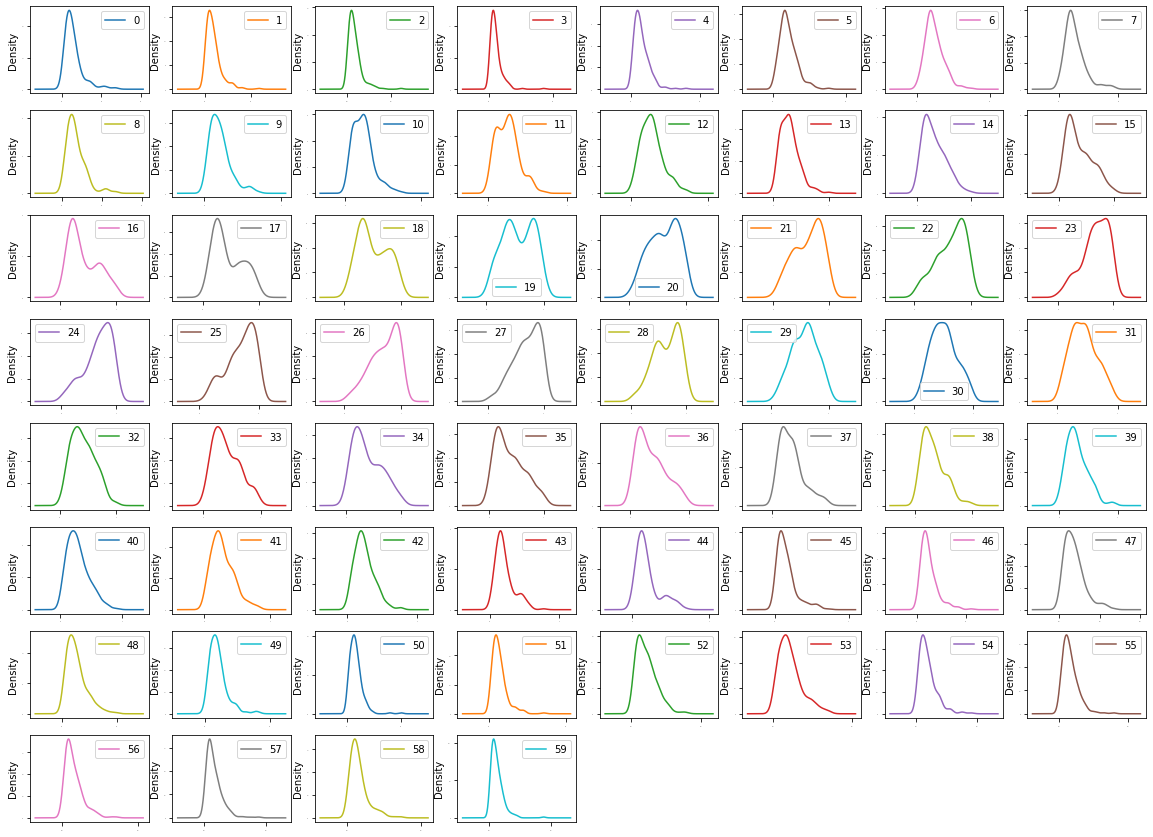

In [14]:
# density
dataset.plot(kind='density', subplots=True, layout=(8,8), sharex=False, legend=True, fontsize=1, figsize=(20, 15))
plt.show()

This is useful because many of the attributes have a skewed distribution.

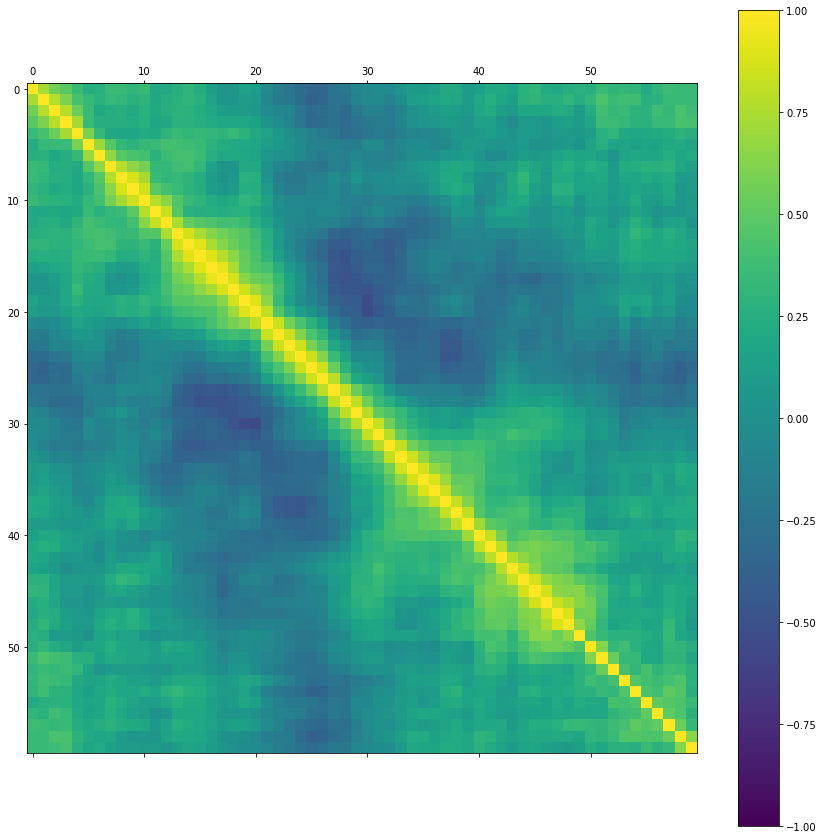

In [25]:
# correlation matrix
fig = pyplot.figure(figsize=(15,15))
ax = fig.add_subplot(111)
cax = ax.matshow(dataset.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
plt.show()

It looks like there is also some structure in the order of the attributes. The yellow around the diagonal suggests that attributes that are next to each other are generally more correlated with each other. The dark blue patches also suggest some moderate negative correlation the further attributes are away from each other in the ordering. This makes sense if the order of the attributes refers to the angle of sensors for the sonar chirp.

### 4. Validation dataset

In [37]:
# Split-out validation dataset
from sklearn.model_selection import train_test_split

array = dataset.values
X = array[:,0:60].astype(float)
Y = array[:,60]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [38]:
print(X_train.shape)
print(X_validation.shape)
print(Y_train.shape)
print(Y_validation.shape)

(166, 60)
(42, 60)
(166,)
(42,)


### 5. Evaluate algorithms

In [39]:
# Spot-Check Algorithms
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import RFE

models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [40]:
# Evaluate each model in turn
results = []
names = []
for name, model in models:
    model.fit(X_train,Y_train)
#     predictions = model.predict(X_validation)
#     result = accuracy_score(Y_validation,predictions)
    result = model.score(X_validation,Y_validation)
    results.append(result)
    names.append(name)
    msg = "%s: %f" % (name, result)
    print(msg)

LR: 0.738095
LDA: 0.690476
KNN: 0.738095
CART: 0.738095
NB: 0.714286
SVM: 0.809524


The results suggest that SVM may be worth further study.

### 6. Standardize data

In [41]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',
LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA',
LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',
KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART',
DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB',
GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))

In [42]:
# Evaluate each model in turn
results = []
names = []
for name, model in pipelines:
    model.fit(X_train,Y_train)
#     predictions = model.predict(X_validation)
#     result = accuracy_score(Y_validation,predictions)
    result = model.score(X_validation,Y_validation)
    results.append(result)
    names.append(name)
    msg = "%s: %f" % (name, result)
    print(msg)

ScaledLR: 0.714286
ScaledLDA: 0.690476
ScaledKNN: 0.833333
ScaledCART: 0.761905
ScaledNB: 0.714286
ScaledSVM: 0.833333


SVM is still doing well, even better than before, the standardization of the data also lifted the performance of KNN to be the most accurate algorithm tested so far.

### 7. Tuning algorithm

In [43]:
# Tune scaled KNN
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
neighbors = [1,3,5,7,9,11,13,15,17,19,21]
param_grid = dict(n_neighbors=neighbors)
model = KNeighborsClassifier()
# kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=None)
grid_result = grid.fit(rescaledX, Y_train)

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

0.843494 (0.034664) with: {'n_neighbors': 1}
0.801604 (0.038296) with: {'n_neighbors': 3}
0.783422 (0.066256) with: {'n_neighbors': 5}
0.729055 (0.059814) with: {'n_neighbors': 7}
0.722816 (0.055813) with: {'n_neighbors': 9}
0.728877 (0.050808) with: {'n_neighbors': 11}
0.734759 (0.036416) with: {'n_neighbors': 13}
0.710695 (0.025619) with: {'n_neighbors': 15}
0.704813 (0.022480) with: {'n_neighbors': 17}
0.722816 (0.030187) with: {'n_neighbors': 19}
0.710517 (0.042849) with: {'n_neighbors': 21}
Best: 0.843494 using {'n_neighbors': 1}


The optimal parameter is K=1, this is interesting as the algorithm will make predictions using the most similar instance in the training dataset alone.

In [44]:
# Tune scaled SVM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
print(param_grid)
model = SVC()
# kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=None)
grid_result = grid.fit(rescaledX, Y_train)

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
    
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


{'C': [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
0.728877 (0.050808) with: {'C': 0.1, 'kernel': 'linear'}
0.583601 (0.075581) with: {'C': 0.1, 'kernel': 'poly'}
0.656328 (0.047126) with: {'C': 0.1, 'kernel': 'rbf'}
0.698396 (0.044917) with: {'C': 0.1, 'kernel': 'sigmoid'}
0.734938 (0.084360) with: {'C': 0.3, 'kernel': 'linear'}
0.644029 (0.086072) with: {'C': 0.3, 'kernel': 'poly'}
0.764706 (0.049720) with: {'C': 0.3, 'kernel': 'rbf'}
0.770766 (0.042402) with: {'C': 0.3, 'kernel': 'sigmoid'}
0.729055 (0.085152) with: {'C': 0.5, 'kernel': 'linear'}
0.679857 (0.098518) with: {'C': 0.5, 'kernel': 'poly'}
0.789127 (0.002496) with: {'C': 0.5, 'kernel': 'rbf'}
0.770766 (0.042402) with: {'C': 0.5, 'kernel': 'sigmoid'}
0.728520 (0.080011) with: {'C': 0.7, 'kernel': 'linear'}
0.752050 (0.111525) with: {'C': 0.7, 'kernel': 'poly'}
0.800713 (0.042474) with: {'C': 0.7, 'kernel': 'rbf'}
0.758645 (0.052013) with: {'C': 0.7, 'kernel': 'sigmoid'

The most accurate configuration was SVM with an RBF kernel and a C value of 1.7, the accuracy 0.83672 is seemingly lower than KNN could achieve (0.84349)

### 8. Ensemble models

In [45]:
# ensembles
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))
results = []
names = []
for name, model in ensembles:
    model.fit(X_train,Y_train)
    result = model.score(X_validation,Y_validation)
    results.append(result)
    names.append(name)
    msg = "%s: %f" % (name, result)
    print(msg)

AB: 0.785714
GBM: 0.904762
RF: 0.857143
ET: 0.880952


GBM techniques provide strong accuracy scores 90.4% with default configurations.

### 9. Finalize model

In [46]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = GradientBoostingClassifier()
model.fit(rescaledX, Y_train)
# transform the validation dataset
rescaled_Xval = scaler.transform(X_validation)
predictions = model.predict(rescaled_Xval)
print(accuracy_score(Y_validation, predictions))

0.9047619047619048


We achieve an accuracy of greater than 90% on the held-out validation dataset, the score better than our expectations estimated above (88%)

In [47]:
# Confusion matrix
print(confusion_matrix(Y_validation, predictions))

[[24  3]
 [ 1 14]]


In [48]:
# Classification report
print(classification_report(Y_validation, predictions))

              precision    recall  f1-score   support

           M       0.96      0.89      0.92        27
           R       0.82      0.93      0.87        15

    accuracy                           0.90        42
   macro avg       0.89      0.91      0.90        42
weighted avg       0.91      0.90      0.91        42

